In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install catboost

In [3]:
import catboost as cb
import lightgbm as lgm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
df_test=pd.read_csv(r"/content/Test Dataset.csv")
df_train=pd.read_csv(r"/content/Train Dataset .csv")


In [5]:
df_train.head(4)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1


In [6]:
df_test.head(4)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0


In [7]:
df_train.columns

Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
New_cols_train={'Id':'id','Age':'age','Sex':'sex','cp':'chest_pain_type',
'trestbps':'resting_blood_pressure','chol':
'serum_cholestoral',
'fbs':'fasting_blood_sugar'
,'restecg':'resting_electrocardiographic_results'
,'thalach':'maximum_heart_rate_achieved'
,'exang':'exercise_induced_angina'
,'oldpeak':'oldpeak_ST'
,'slope':'The_slope'
,'ca':'number_of_major_vessels'
,'thal':'thals'}

In [9]:
df_test.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [10]:
New_cols_test={'id':'id','age':'age','sex':'sex','cp':'chest_pain_type',
'trestbps':'resting_blood_pressure','chol':
'serum_cholestoral',
'fbs':'fasting_blood_sugar'
,'restecg':'resting_electrocardiographic_results'
,'thalach':'maximum_heart_rate_achieved'
,'exang':'exercise_induced_angina'
,'oldpeak':'oldpeak_ST'
, 'slope':'The_slope'
,'ca':'number_of_major_vessels'
,'thal':'thals'}

In [11]:
df_train = df_train.rename(columns=New_cols_train)
df_test = df_test.rename(columns=New_cols_test)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    7303 non-null   int64  
 1   age                                   7303 non-null   int64  
 2   sex                                   7303 non-null   int64  
 3   chest_pain_type                       7303 non-null   int64  
 4   resting_blood_pressure                7303 non-null   int64  
 5   serum_cholestoral                     7303 non-null   int64  
 6   fasting_blood_sugar                   7303 non-null   int64  
 7   resting_electrocardiographic_results  7303 non-null   int64  
 8   maximum_heart_rate_achieved           7303 non-null   int64  
 9   exercise_induced_angina               7303 non-null   int64  
 10  oldpeak_ST                            7303 non-null   float64
 11  The_slope        

In [13]:
for i in df_train.columns:
    print(df_train[i].unique())

[16167 11275 13251 ... 13219 15349 15363]
[33 53 37 75 35 69 44 32 36 60 68 72 43 66 30 50 59 71 31 39 73 76 65 40
 46 58 61 47 77 45 57 74 62 29 54 34 52 67 42 41 38 51 49 64 55 63 48 70
 56]
[0 1]
[1 2 0 3]
[158 198 101 113 139 164 134 199 126 107 189 135 137 153 154 148 169 132
 171 175 180 138 183 130 160 174 172 187 144 140 186 188 182 177 156 157
 102 191 178  94 181 125 196 117 100 119 194 197 104 147 133  95 176 127
  99  96 108 146 161 150 152 185 173 200 195 184 121 167 129 143 165 136
 193 179 122 109 168  98 115 131  97 123 112 128 170 155 105 192 162 118
 163 141 151 149 142 111 124 114 116 166 159 103 110 120 190 106 145]
[205 154 202 306 419 280 129 341 198 389 164 213 141 206 216 132 488 264
 142 443 445 321 162 467 274 312 180 552 450 316 181 277 190 318 428 197
 377 463 548 415 454 167 161 446 460 422 214 273 530 370 210 333 169 221
 271 307 242 283 537 556 158 554 145 405 485 130 486 434 355 352 278 237
 208 500 396 231 397 447 246 533 260 327 501 348 275 538 385 265

<Axes: >

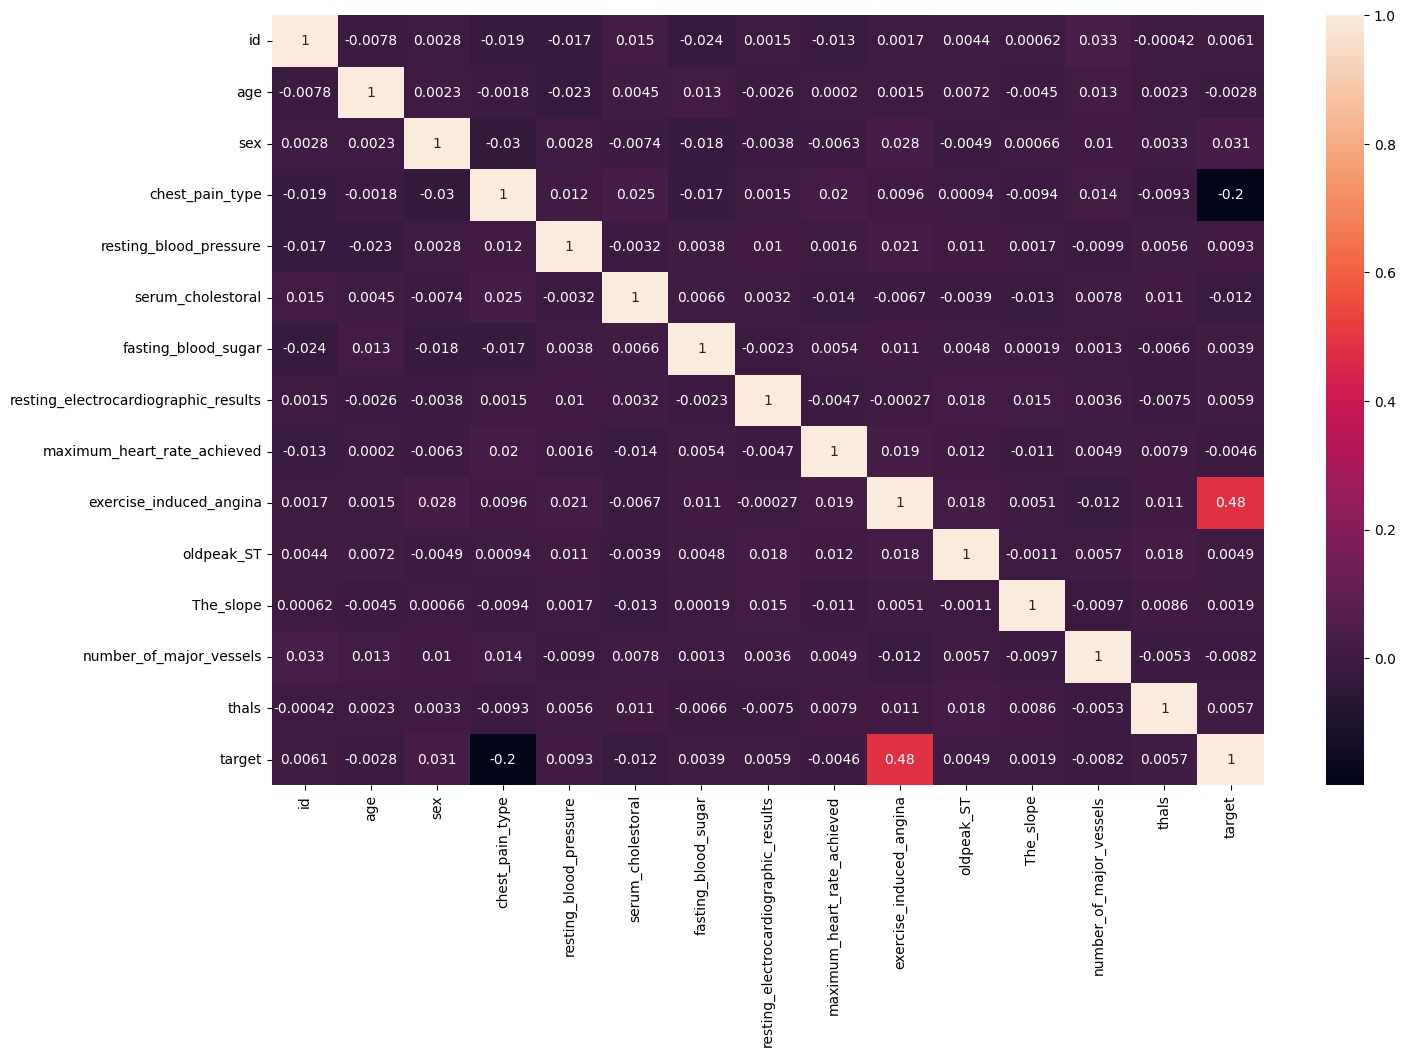

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,10]
sns.heatmap(df_train.corr(),annot=True)

In [15]:
df_train['target'].value_counts()

,count
target,
1,5941
0,1362


In [16]:
 min(df_train['target'].value_counts())

1362

In [17]:
max(df_train['target'].value_counts())

5941

In [18]:
df_train['target'].value_counts().index[0]

1

In [19]:

desired_count = 5941

# Undersample the majority class
majority_class =df_train['target'].value_counts().index[0]
majority_samples = df_train[df_train['target'] == majority_class].sample(desired_count)

# Combine the minority class and undersampled majority class
undersampled_df = pd.concat([df_train[df_train['target'] == 0], majority_samples])

# Shuffle the undersampled data
df_train_US = undersampled_df.sample(frac=1).reset_index(drop=True)

# Verify the class balance
print(df_train_US['target'].value_counts())

target
1    5941
0    1362
Name: count, dtype: int64


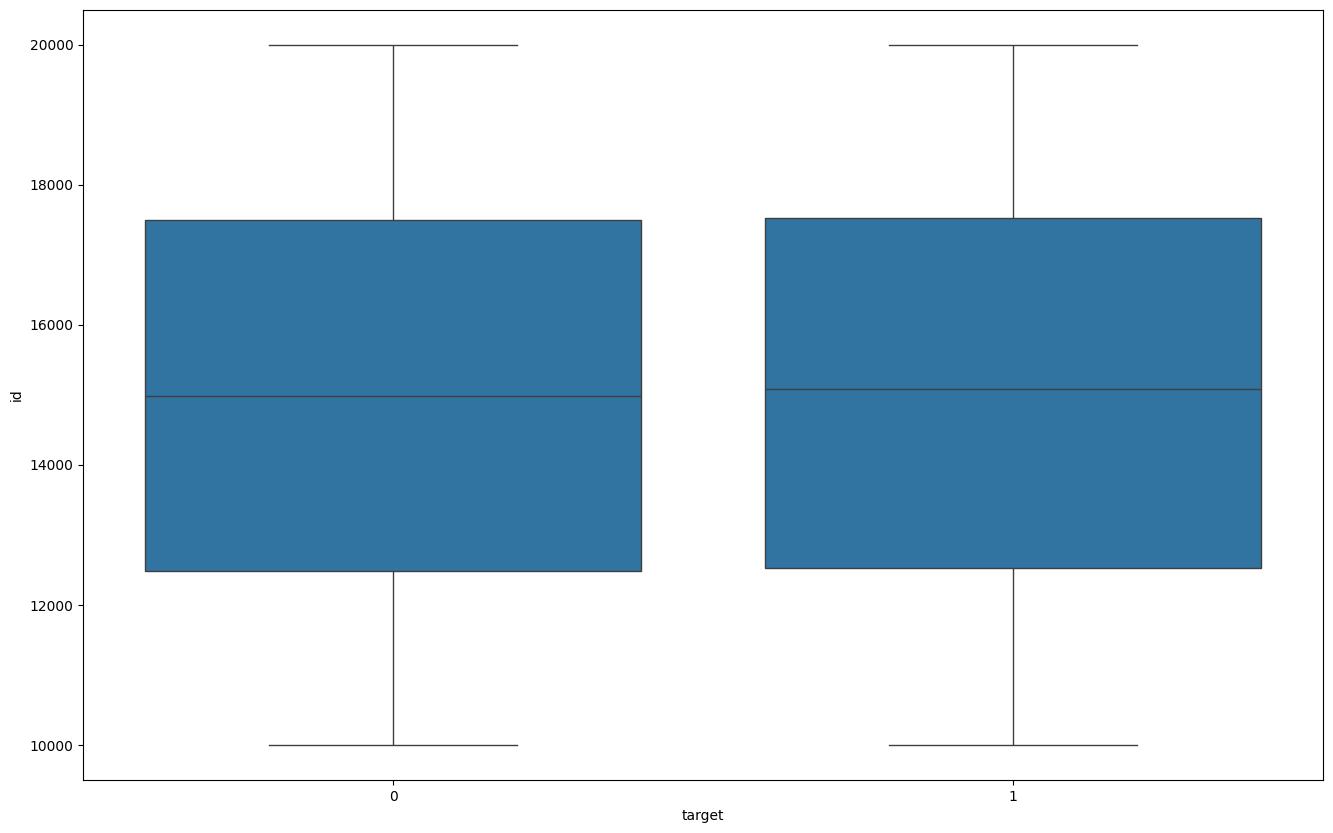

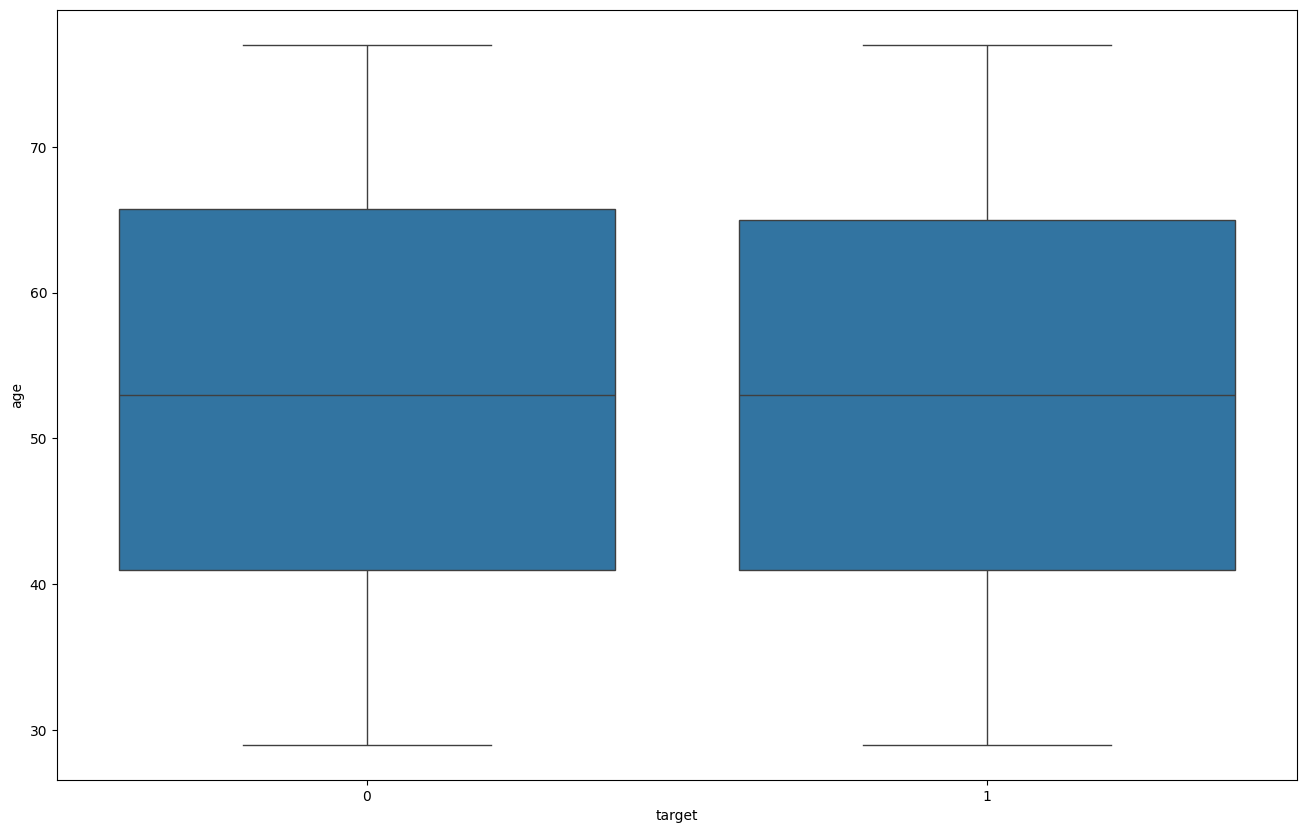

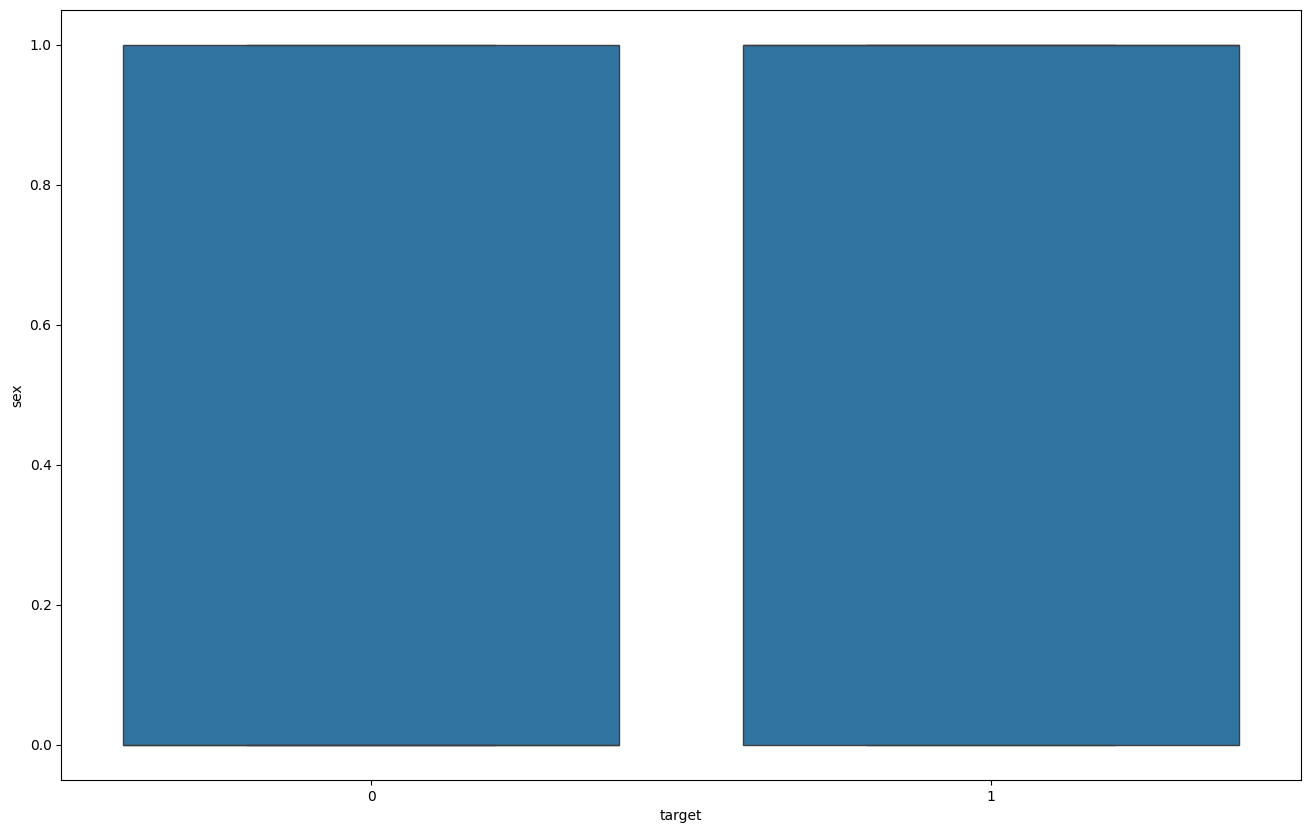

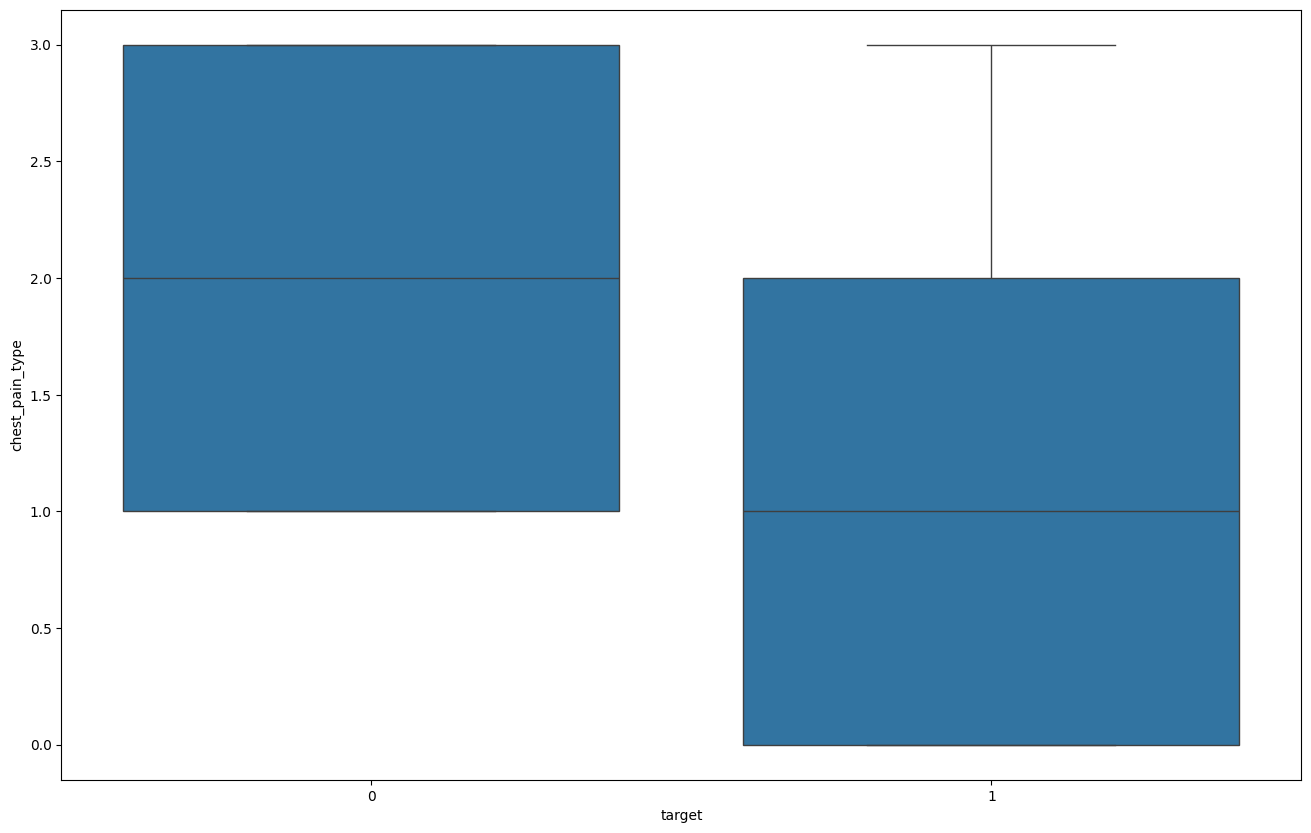

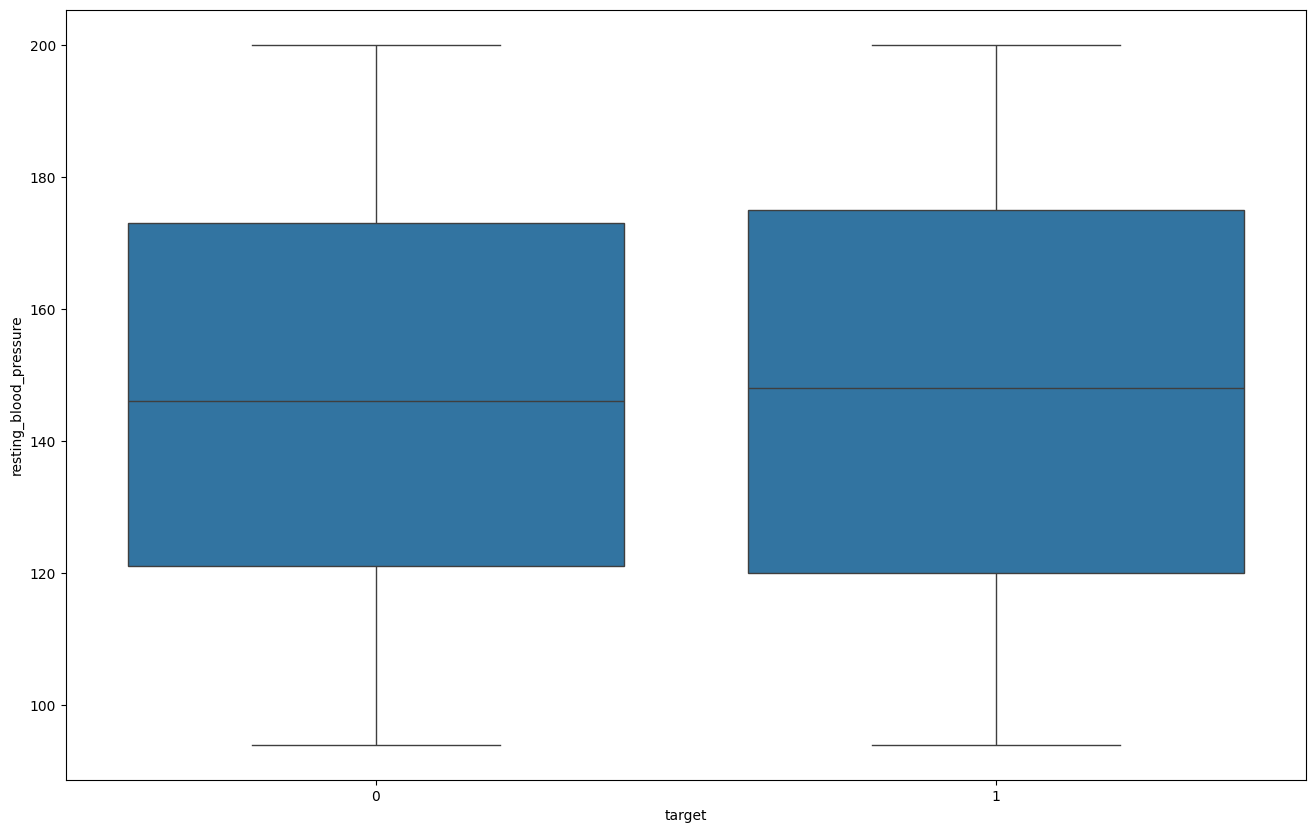

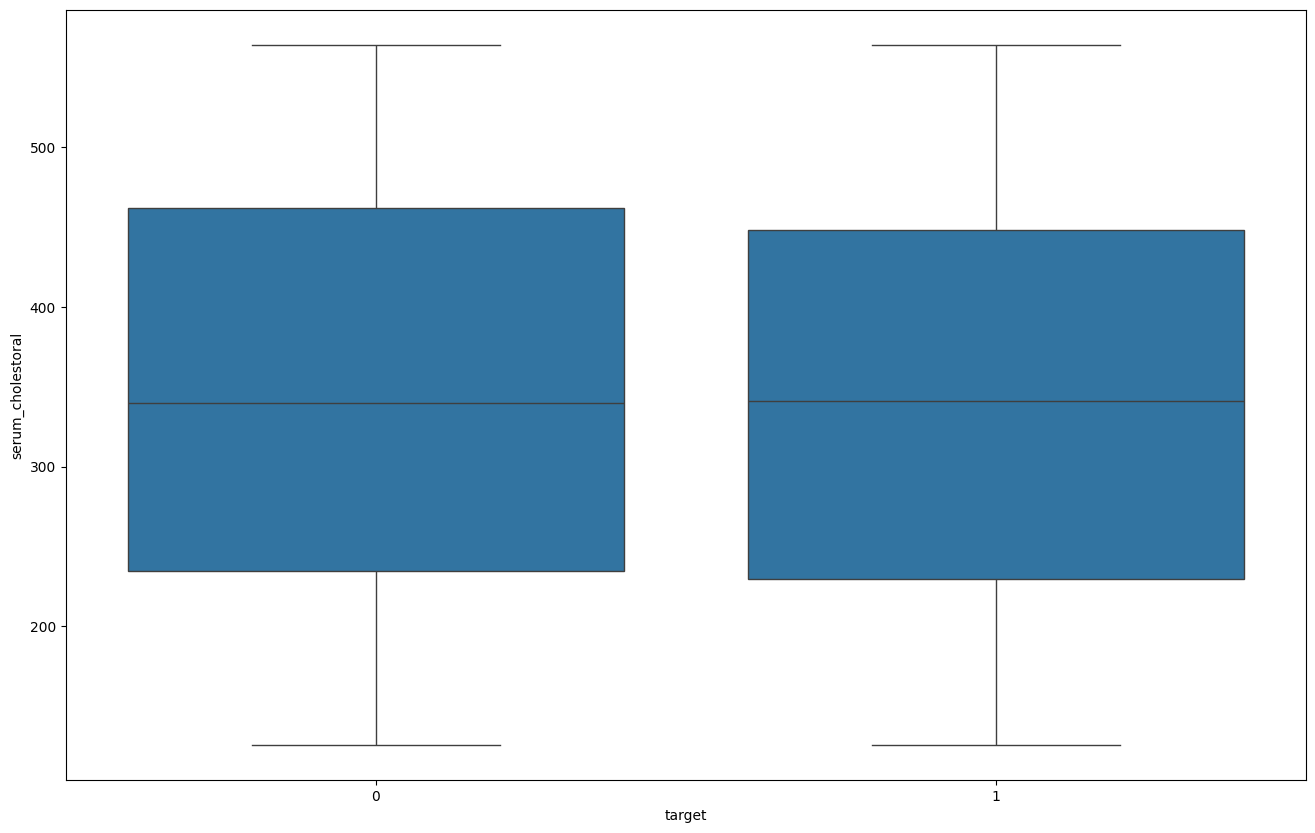

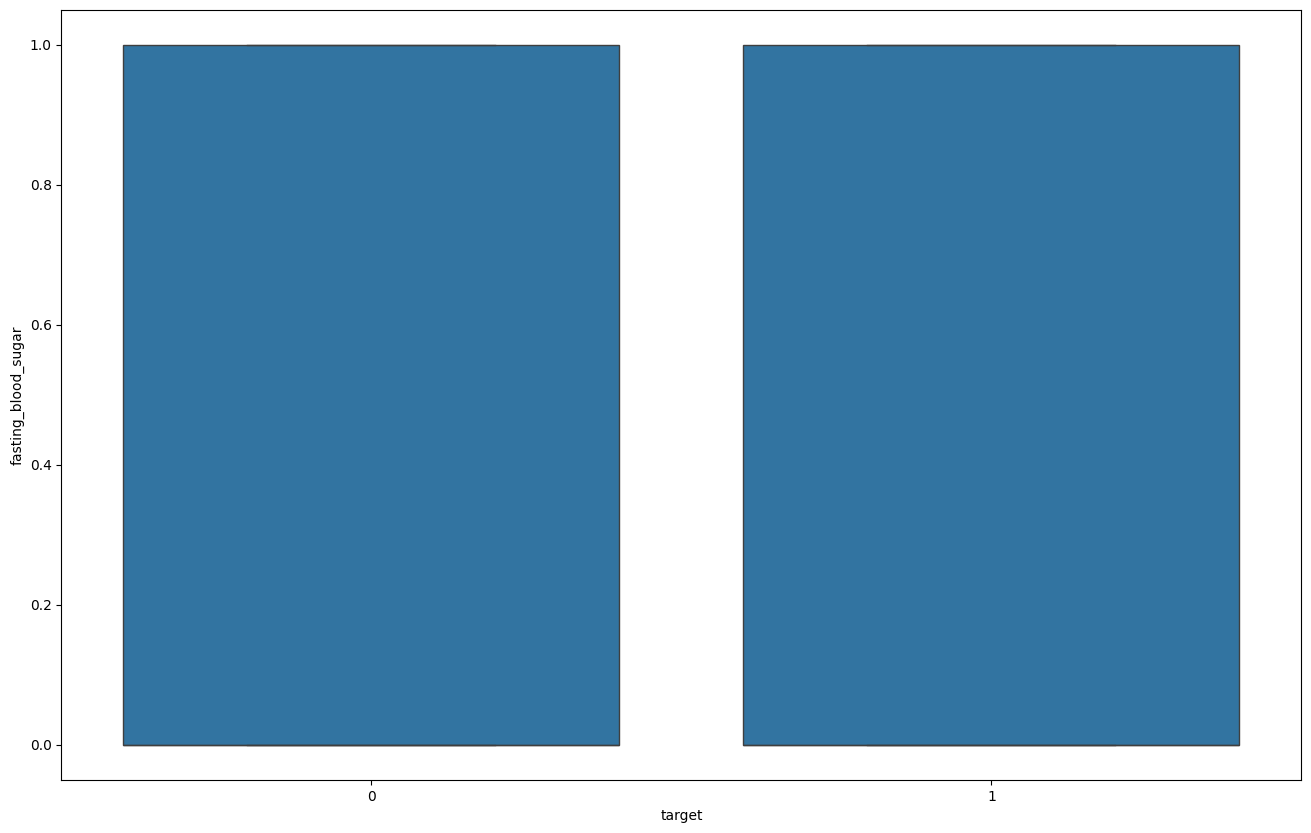

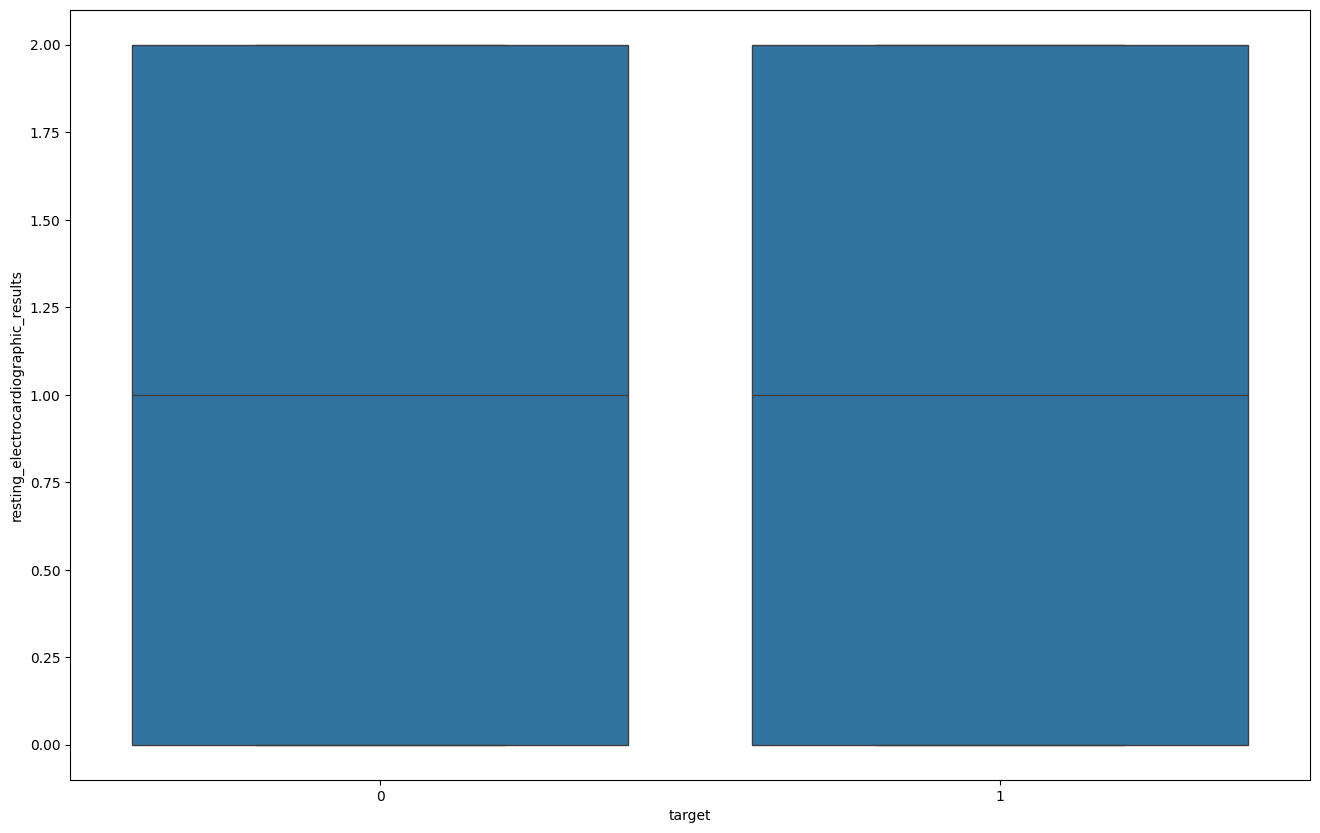

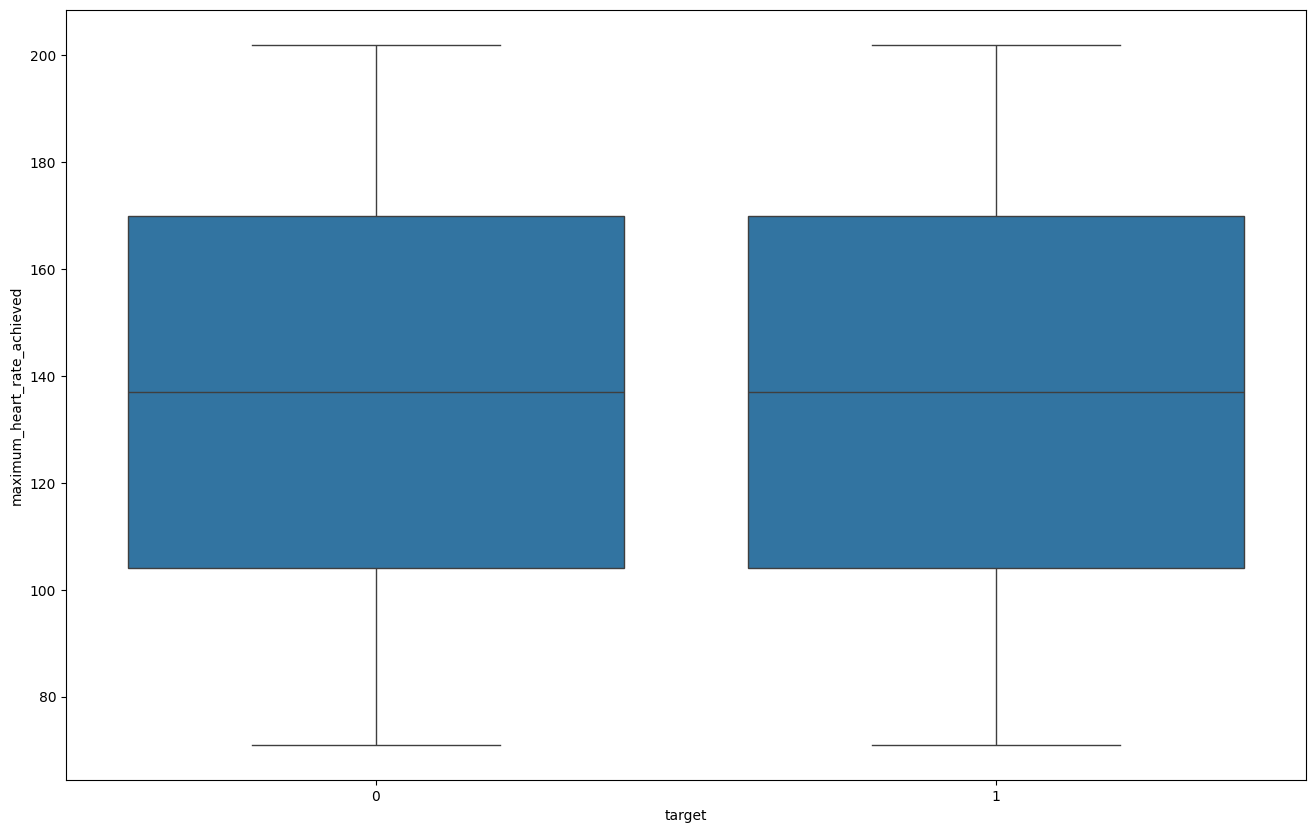

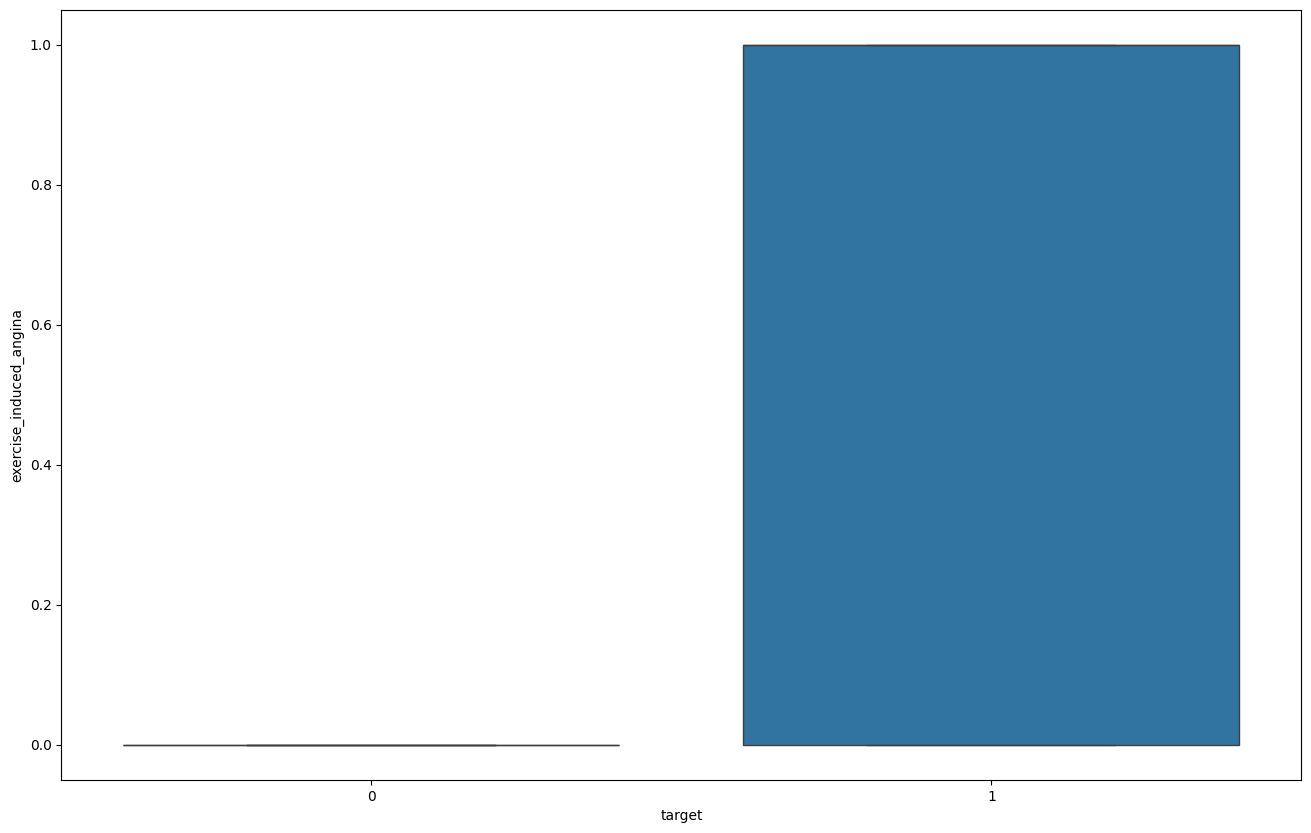

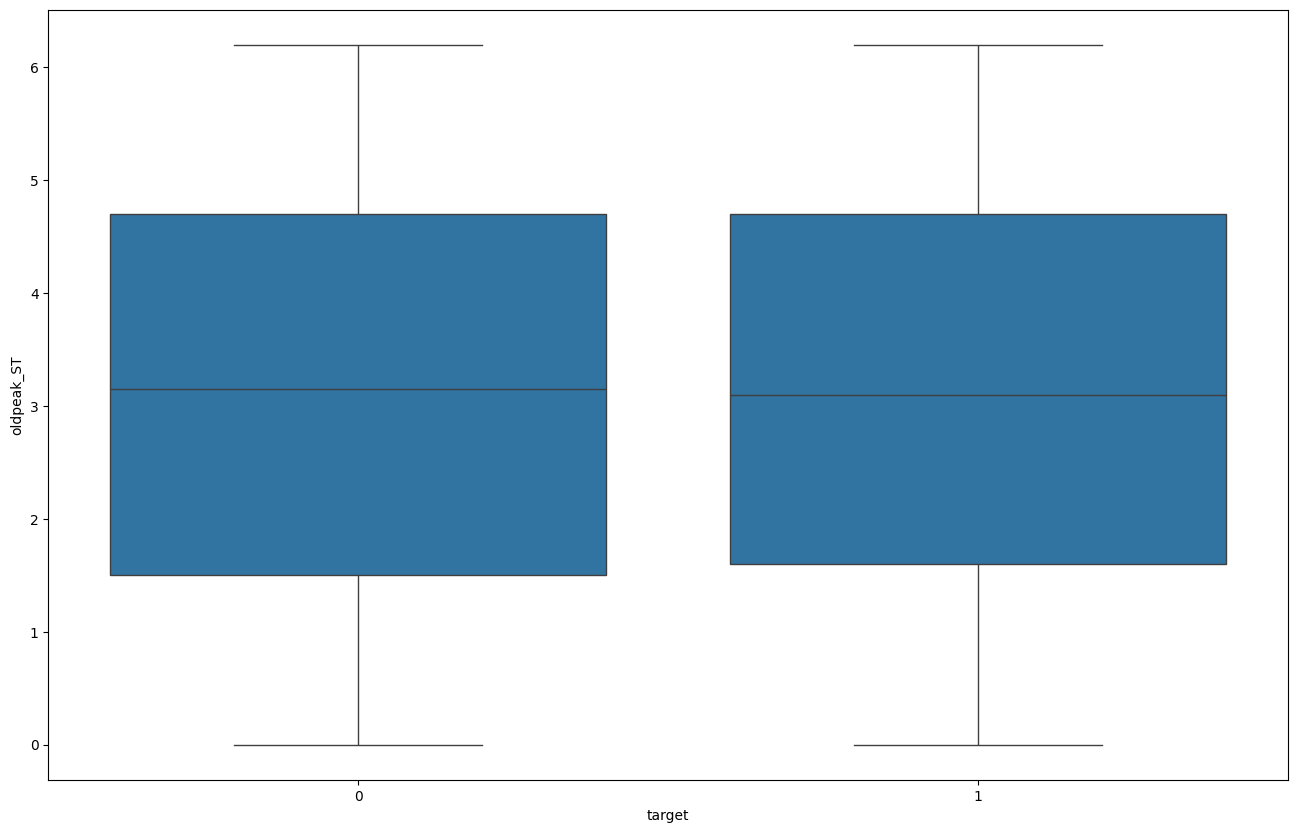

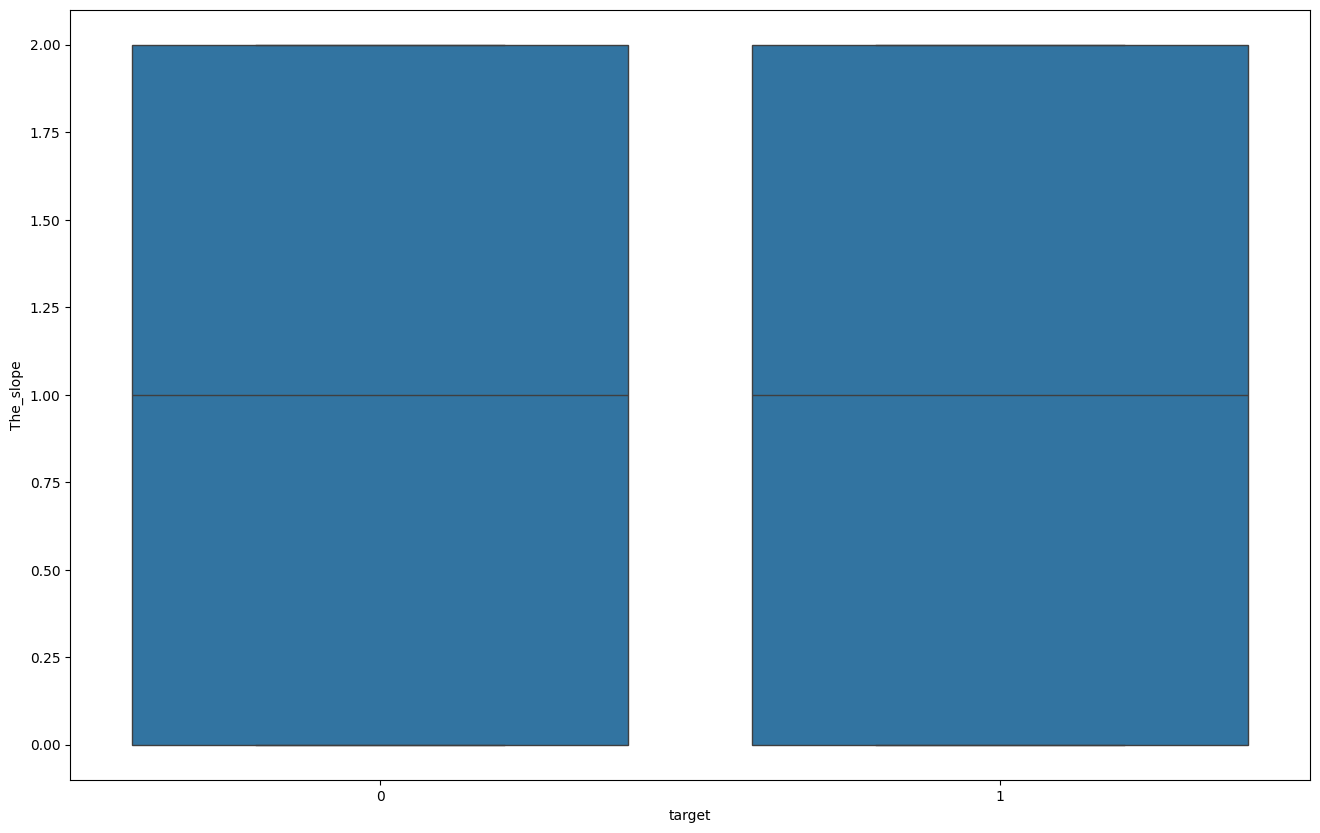

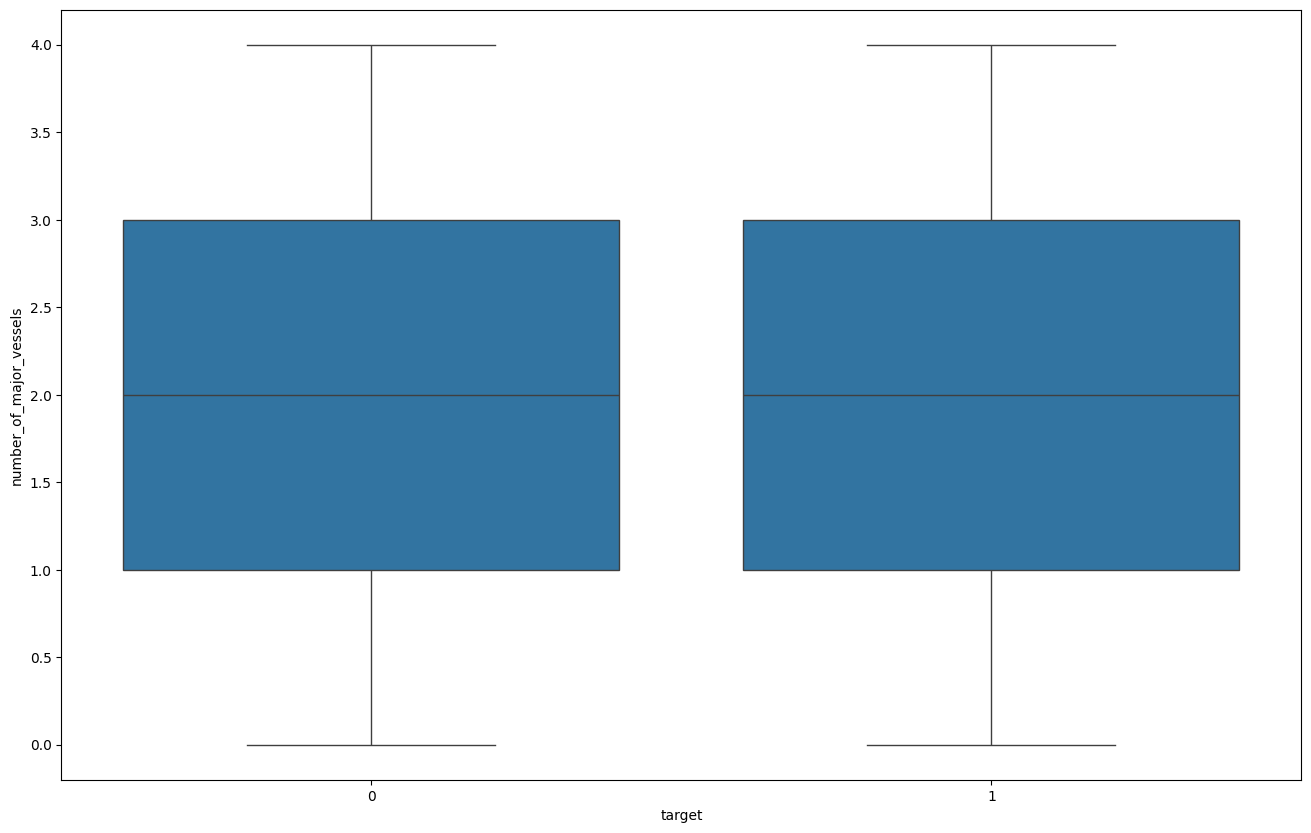

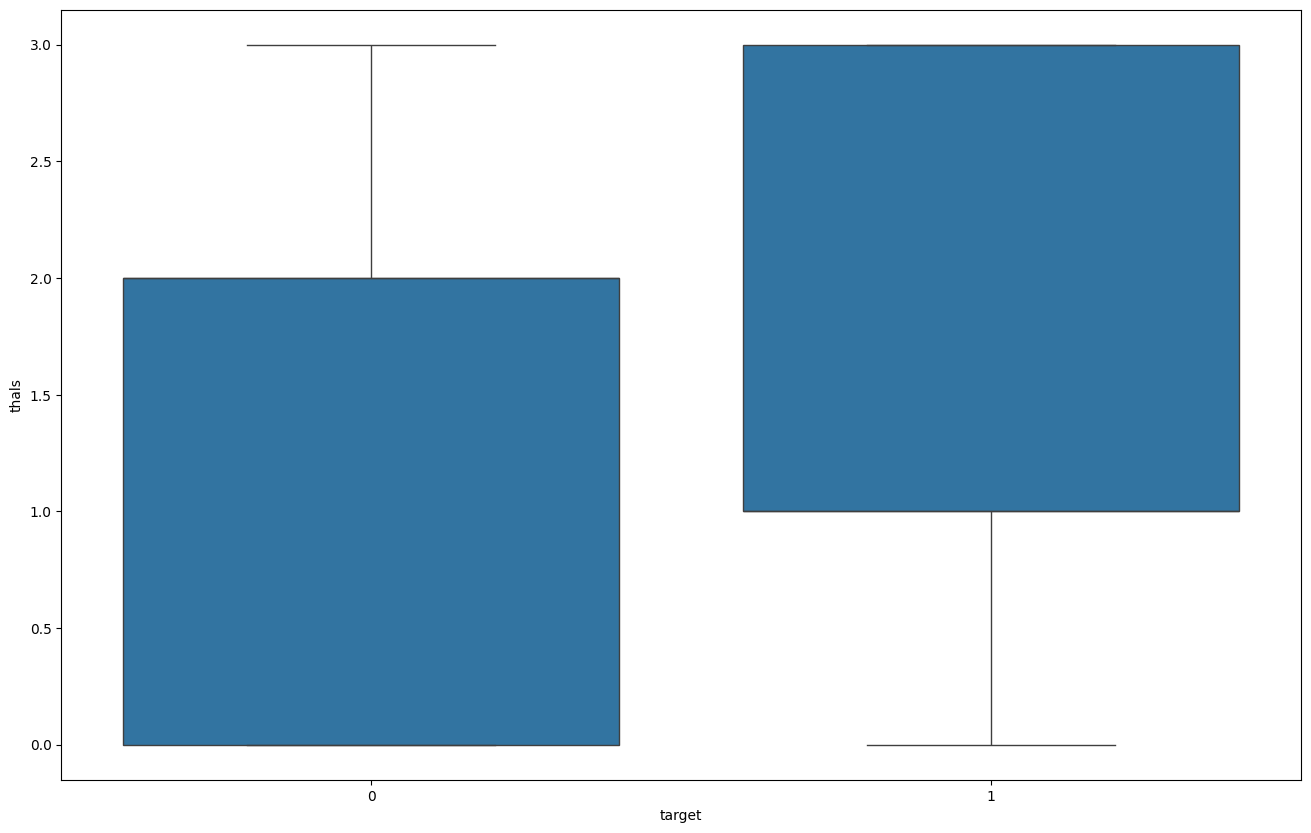

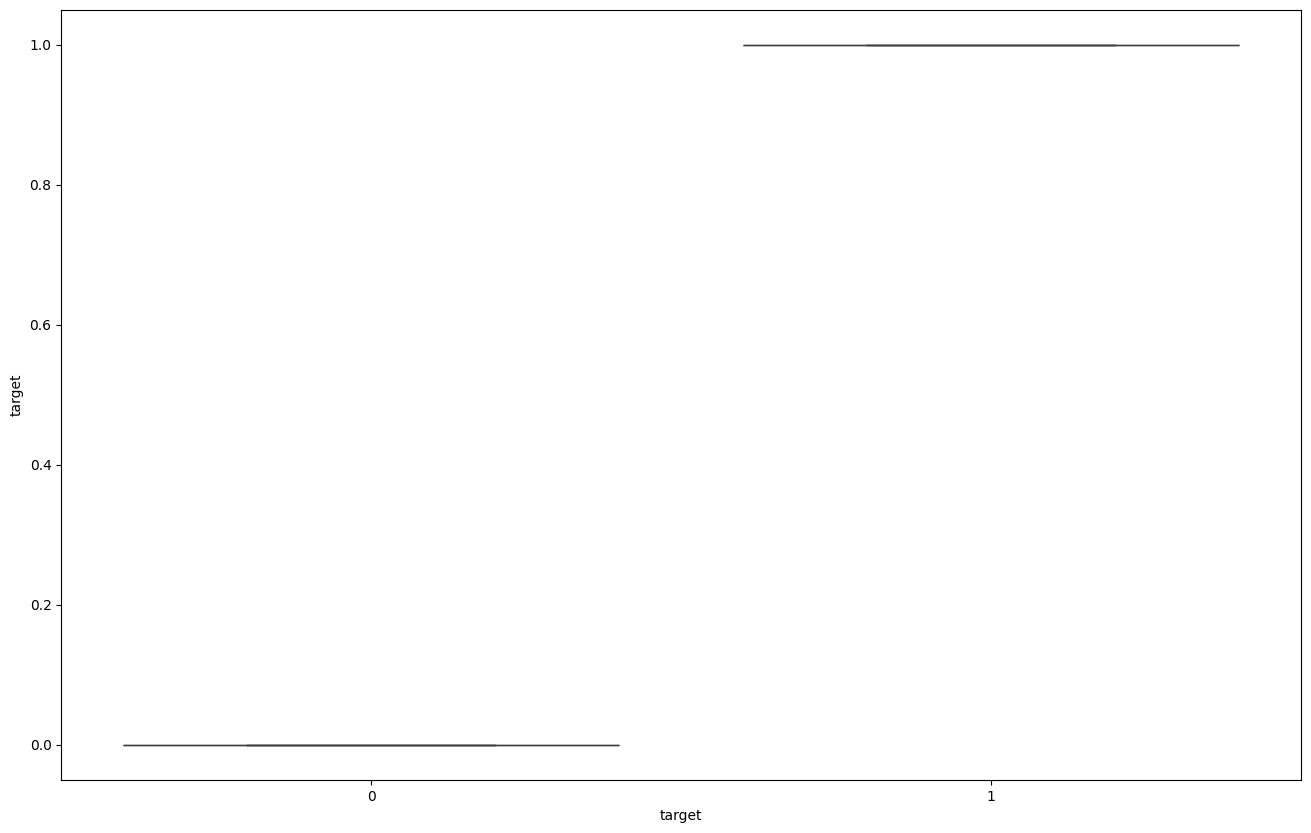

In [20]:
for i in df_train.columns:
  plt.figure(figsize=(16,10))

  sns.boxplot(data=df_train,x='target',y=df_train[i])

In [21]:
df_train_US.shape[0]

7303

In [22]:
df_train_US.target.value_counts()

,count
target,
1,5941
0,1362


In [23]:
n_train=df_train_US.shape[0]
n_test=df_test.shape[0]
y=df_train_US.target
df_all=pd.concat((df_train_US,df_test)).reset_index(drop=True)
df_all.drop(['target'],axis=1,inplace=True)
print(df_all.shape)
print(df_all.tail(5))

(10000, 14)
         id  age  sex  chest_pain_type  resting_blood_pressure  \
9995  14964   34    0                3                     136   
9996  16774   72    0                1                     104   
9997  18884   31    1                0                     153   
9998  10000   71    0                0                     111   
9999  17660   51    1                3                     133   

      serum_cholestoral  fasting_blood_sugar  \
9995                291                    0   
9996                166                    1   
9997                457                    1   
9998                242                    1   
9999                481                    0   

      resting_electrocardiographic_results  maximum_heart_rate_achieved  \
9995                                     1                          163   
9996                                     2                           95   
9997                                     1                          170   
99

In [24]:
df_all

,id,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak_ST,The_slope,number_of_major_vessels,thals
0,12978,69,1,0,175,226,0,0,71,0,4.1,1,0,2
1,18711,50,0,3,153,239,0,1,85,0,4.3,1,2,1
2,13221,39,1,3,107,435,1,0,196,0,2.7,0,3,0
3,19735,74,1,3,190,551,1,2,175,1,2.7,1,1,1
4,17096,29,1,2,156,278,1,2,188,0,0.4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3
9996,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2
9997,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1
9998,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2


In [25]:




# Binning functions
def age_bin(age):
    if age <= 18:
        return 'Young Adult'
    elif age <=35:
        return 'Middle Age'

    else:
        return 'Senior'

def resting_blood_pressure_bin(rbp):
    if rbp < 200:
        return 'Low'
    elif rbp < 140:
        return 'Normal'

    else:
        return 'Hypertension'

def serum_cholestoral_bin(sc):
    if sc <= 200:
        return 'Low'
    elif sc <= 240:
        return 'Borderline High'

    else:
        return 'High'

def maximum_heart_rate_achieved_bin(mhra):
    if mhra <= 130:
        return 'Low'

    elif mhra <= 160:
        return 'Average'

    else:
        return 'High'

def oldpeak_ST_bin(ops):
    if ops <=0 :
        return 'Low'
    elif ops <= 1.5:
        return 'Moderate'

    else:
        return 'High'

# Apply binning
df_all['age_bin'] = df_all['age'].apply(age_bin)
df_all['resting_blood_pressure_bin'] = df_all['resting_blood_pressure'].apply(resting_blood_pressure_bin)
df_all['serum_cholestoral_bin'] = df_all['serum_cholestoral'].apply(serum_cholestoral_bin)
df_all['maximum_heart_rate_achieved_bin'] = df_all['maximum_heart_rate_achieved'].apply(maximum_heart_rate_achieved_bin)
df_all['oldpeak_ST_bin'] = df_all['oldpeak_ST'].apply(oldpeak_ST_bin)

# Drop original columns if desired
df_all.drop(['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak_ST'], axis=1, inplace=True)

print(df_all.head())

      id  sex  chest_pain_type  fasting_blood_sugar  \
0  12978    1                0                    0   
1  18711    0                3                    0   
2  13221    1                3                    1   
3  19735    1                3                    1   
4  17096    1                2                    1   

   resting_electrocardiographic_results  exercise_induced_angina  The_slope  \
0                                     0                        0          1   
1                                     1                        0          1   
2                                     0                        0          0   
3                                     2                        1          1   
4                                     2                        0          1   

   number_of_major_vessels  thals     age_bin resting_blood_pressure_bin  \
0                        0      2      Senior                        Low   
1                        2      1      Sen

In [26]:

mapping = {
    'age_bin': {'Young Adult': 1, 'Middle Age': 2,'Senior': 3},
    'resting_blood_pressure_bin': {'Low': 1, 'Normal': 2, 'Hypertension': 3},
    'serum_cholestoral_bin': {'Low': 1, 'Borderline High': 2,'High': 3},
    'maximum_heart_rate_achieved_bin': {'Low': 1,  'Average': 2,'High': 3},
    'oldpeak_ST_bin': {'Low': 1, 'Moderate': 2, 'High': 3}
}

# Create new numerical columns
for col in mapping.keys():
    df_all[f"{col}_numerical"] = df_all[col].map(mapping[col])

print(df_all.head())

      id  sex  chest_pain_type  fasting_blood_sugar  \
0  12978    1                0                    0   
1  18711    0                3                    0   
2  13221    1                3                    1   
3  19735    1                3                    1   
4  17096    1                2                    1   

   resting_electrocardiographic_results  exercise_induced_angina  The_slope  \
0                                     0                        0          1   
1                                     1                        0          1   
2                                     0                        0          0   
3                                     2                        1          1   
4                                     2                        0          1   

   number_of_major_vessels  thals     age_bin resting_blood_pressure_bin  \
0                        0      2      Senior                        Low   
1                        2      1      Sen

In [27]:
df_all.drop(['age_bin',
       'resting_blood_pressure_bin', 'serum_cholestoral_bin',
       'maximum_heart_rate_achieved_bin', 'oldpeak_ST_bin'], axis=1, inplace=True)


In [28]:
# Define a dictionary mapping the binned column names to the original names
mapping = {
    'age_bin_numerical': 'age',
    'resting_blood_pressure_bin_numerical': 'resting_blood_pressure',
    'serum_cholestoral_bin_numerical': 'serum_cholestoral',
    'maximum_heart_rate_achieved_bin_numerical': 'maximum_heart_rate_achieved',
    'oldpeak_ST_bin_numerical': 'oldpeak_ST'
}

# Rename the columns using the mapping
df_all = df_all.rename(columns=mapping)

print(df_all.head())

      id  sex  chest_pain_type  fasting_blood_sugar  \
0  12978    1                0                    0   
1  18711    0                3                    0   
2  13221    1                3                    1   
3  19735    1                3                    1   
4  17096    1                2                    1   

   resting_electrocardiographic_results  exercise_induced_angina  The_slope  \
0                                     0                        0          1   
1                                     1                        0          1   
2                                     0                        0          0   
3                                     2                        1          1   
4                                     2                        0          1   

   number_of_major_vessels  thals  age  resting_blood_pressure  \
0                        0      2    3                       1   
1                        2      1    3                       1

In [29]:
df_all.columns

Index(['id', 'sex', 'chest_pain_type', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'The_slope', 'number_of_major_vessels', 'thals', 'age',
       'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak_ST'],
      dtype='object')

In [30]:
import pandas as pd

# Original columns to keep
original_cols = ['id', 'sex', 'chest_pain_type', 'fasting_blood_sugar',
                 'resting_electrocardiographic_results', 'exercise_induced_angina',
                 'The_slope', 'number_of_major_vessels', 'thals']

# One-hot encode each column individually and concatenate
df_all = pd.concat([df_all[original_cols],
                     pd.get_dummies(df_all['age'], prefix='age'),
                     pd.get_dummies(df_all['resting_blood_pressure'], prefix='resting_blood_pressure'),
                     pd.get_dummies(df_all['serum_cholestoral'], prefix='serum_cholestoral'),
                     pd.get_dummies(df_all['maximum_heart_rate_achieved'], prefix='maximum_heart_rate_achieved'),
                     pd.get_dummies(df_all['oldpeak_ST'], prefix='oldpeak_ST')],
                    axis=1)

# Drop the original columns
# = df_all.drop(['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak_ST'], axis=1)

In [31]:
df_all.columns

Index(['id', 'sex', 'chest_pain_type', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'The_slope', 'number_of_major_vessels', 'thals', 'age_2', 'age_3',
       'resting_blood_pressure_1', 'resting_blood_pressure_3',
       'serum_cholestoral_1', 'serum_cholestoral_2', 'serum_cholestoral_3',
       'maximum_heart_rate_achieved_1', 'maximum_heart_rate_achieved_2',
       'maximum_heart_rate_achieved_3', 'oldpeak_ST_1', 'oldpeak_ST_2',
       'oldpeak_ST_3'],
      dtype='object')

In [32]:

#df_all = pd.concat([df_all[['id']],df_all.drop('id', axis=1)], axis=1)

In [33]:
df_train_cleaned1=df_all[:n_train]
df_test_cleaned1=df_all[n_train:]

In [34]:
#df_train_cleaned1.drop(['id'], axis=1, inplace=True)
#df_test_cleaned1.drop(['id'], axis=1, inplace=True)

In [35]:
df_test_cleaned=df_test_cleaned1
df_train_cleaned=df_train_cleaned1

In [36]:
test_id=pd.read_csv(r"/content/Test Dataset.csv")

In [37]:
test_id.head(3).id

,id
0,16501
1,10444
2,14288


In [38]:
df_test_cleaned.head(3).id

,id
7303,16501
7304,10444
7305,14288


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train_cleaned,y,test_size=0.2,random_state=42,shuffle=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train_cleaned,y,test_size=0.2,random_state=42,shuffle=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [41]:
import catboost as cb
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [42]:
catboost_model = cb.CatBoostClassifier(
    iterations=500,
    learning_rate=0.8,
    depth=6,
    l2_leaf_reg=2,
    bagging_temperature=2,
    random_strength=0.9109,
    border_count=128,
    model_size_reg=0.01,
    od_type='Iter',
    od_wait=20,
    thread_count=2,
    metric_period=20,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=200

)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", catboost_accuracy)

0:	total: 51.2ms	remaining: 25.5s
200:	total: 1.04s	remaining: 1.54s
400:	total: 1.71s	remaining: 423ms
499:	total: 2s	remaining: 0us
CatBoost Accuracy: 0.8199863107460643


In [43]:
test_id=pd.read_csv(r"/content/Test Dataset.csv")

In [44]:
predcb=catboost_model.predict(df_test_cleaned)
output=pd.DataFrame({'Id':test_id['id'],'target':predcb})
output.to_csv('A13BAAat.csv',index=False)

In [45]:
lgbm_model = lgm.LGBMClassifier(
    num_leaves=10,
    max_depth=4,
    learning_rate=0.1,
    n_estimators=50,
    objective='binary',
    metric='auc',
    random_state=42,)

lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("LightGBM Accuracy:", lgbm_accuracy)

[LightGBM] [Info] Number of positive: 4742, number of negative: 1100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811708 -> initscore=1.461149
[LightGBM] [Info] Start training from score 1.461149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [46]:
predlgb=lgbm_model.predict(df_test_cleaned)
output=pd.DataFrame({'Id':test_id['id'],'target':predlgb})
output.to_csv('ALGM_lgbm.csv',index=False)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [48]:
dt_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=3,
    min_samples_leaf=3,
)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7967145790554415


In [49]:
pred_dt=dt_model.predict(df_test_cleaned)
output=pd.DataFrame({'Id':test_id['id'],'target':pred_dt})
output.to_csv('dt.csv',index=False)

In [50]:
df_test_cleaned.head(3)

,id,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,The_slope,number_of_major_vessels,thals,age_2,...,resting_blood_pressure_3,serum_cholestoral_1,serum_cholestoral_2,serum_cholestoral_3,maximum_heart_rate_achieved_1,maximum_heart_rate_achieved_2,maximum_heart_rate_achieved_3,oldpeak_ST_1,oldpeak_ST_2,oldpeak_ST_3
7303,16501,1,0,0,2,1,1,0,1,False,...,False,False,False,True,False,False,True,False,False,True
7304,10444,1,0,0,2,1,2,2,2,False,...,False,False,True,False,True,False,False,False,False,True
7305,14288,1,0,1,1,1,1,1,0,False,...,False,False,False,True,True,False,False,False,True,False


In [51]:
test_id.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0


In [52]:
rf_model12 = RandomForestClassifier(
 max_depth=28,
    n_estimators=500,
    min_samples_split=3,
    min_samples_leaf=3
)  # Adjust n_estimators as needed
rf_model12.fit(X_train, y_train)
rf_predictions = rf_model12.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8049281314168378


In [53]:
predNrf=rf_model12.predict(df_test_cleaned)
output=pd.DataFrame({'Id':test_id['id'],'target':predNrf})
output.to_csv('ABAtest.csv',index=False)